In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import simplefilter
from pandas.core.common import SettingWithCopyWarning
simplefilter(action='ignore', category=SettingWithCopyWarning)
df = pd.read_csv('database.csv', low_memory=False)
#Can we determine if a crime was murder or manslaughter 
#Can we predict if a crime was a result of negligence

In [2]:
mask = df['Crime Solved'] == 'No'
df = df[~mask]

print(df['Crime Solved'].describe())


df = df.drop('Crime Solved', axis = 1)

df = df.drop("Record ID", axis = 1)
df = df.drop("Agency Code", axis = 1)


col = df.columns

df['Perpetrator Age'] = df['Perpetrator Age'].astype(int)

mask = df['Perpetrator Age'] < 3
df_0 = df[mask]
df = df[~mask]

avg = round(df['Perpetrator Age'].mean())

df_0['Perpetrator Age'] = avg

df = pd.concat([df, df_0], axis = 0)

print(df['Perpetrator Age'].describe())

df

count     448172
unique         1
top          Yes
freq      448172
Name: Crime Solved, dtype: object
count    448172.000000
mean         30.747021
std          12.385300
min           3.000000
25%          21.000000
50%          28.000000
75%          36.000000
max          99.000000
Name: Perpetrator Age, dtype: float64


,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Victim Sex,Victim Age,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Male,14,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Male,43,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
3,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Male,43,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
5,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Male,30,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Female,42,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638334,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,August,12,Murder or Manslaughter,Male,26,...,Unknown,Male,31,Black,Unknown,Unknown,Handgun,0,1,FBI
638336,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,August,14,Murder or Manslaughter,Male,45,...,Unknown,Male,31,Unknown,Unknown,Stranger,Handgun,0,1,FBI
638339,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,September,3,Murder or Manslaughter,Female,26,...,Unknown,Male,31,Black,Unknown,Unknown,Handgun,0,0,FBI
638342,Milwaukee,Municipal Police,Milwaukee,Wisconsin,2014,October,1,Murder or Manslaughter,Female,50,...,Unknown,Male,31,Black,Unknown,Unknown,Handgun,0,0,FBI


In [3]:
imask = df['Victim Age'] == 998
df_1 = df[imask]
df = df[~imask]

avg = round(df['Victim Age'].mean())

df_1['Victim Age'] = avg

df = pd.concat([df, df_1], axis = 0)

print(df['Victim Age'].describe())

count    448172.000000
mean         33.213672
std          17.621180
min           0.000000
25%          22.000000
50%          30.000000
75%          42.000000
max          99.000000
Name: Victim Age, dtype: float64


In [4]:
print(df['Incident'].describe())

count    448172.000000
mean         21.766726
std          93.318677
min           0.000000
25%           1.000000
50%           2.000000
75%           7.000000
max         999.000000
Name: Incident, dtype: float64


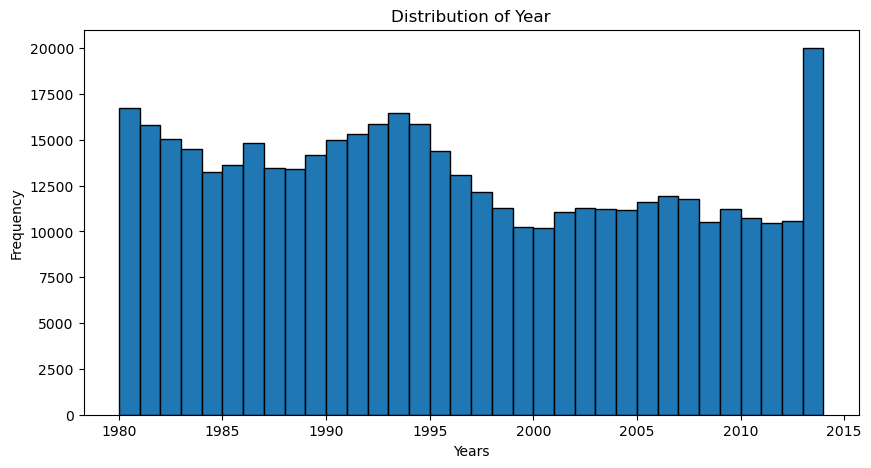

In [5]:
df['Year'].hist(bins = 34, edgecolor = (0,0,0), figsize=(10,5))
plt.grid(False)
plt.xlabel('Years')
plt.ylabel('Frequency')
column = 'Year'
plt.title('Distribution of {}'.format(column))
plt.show()

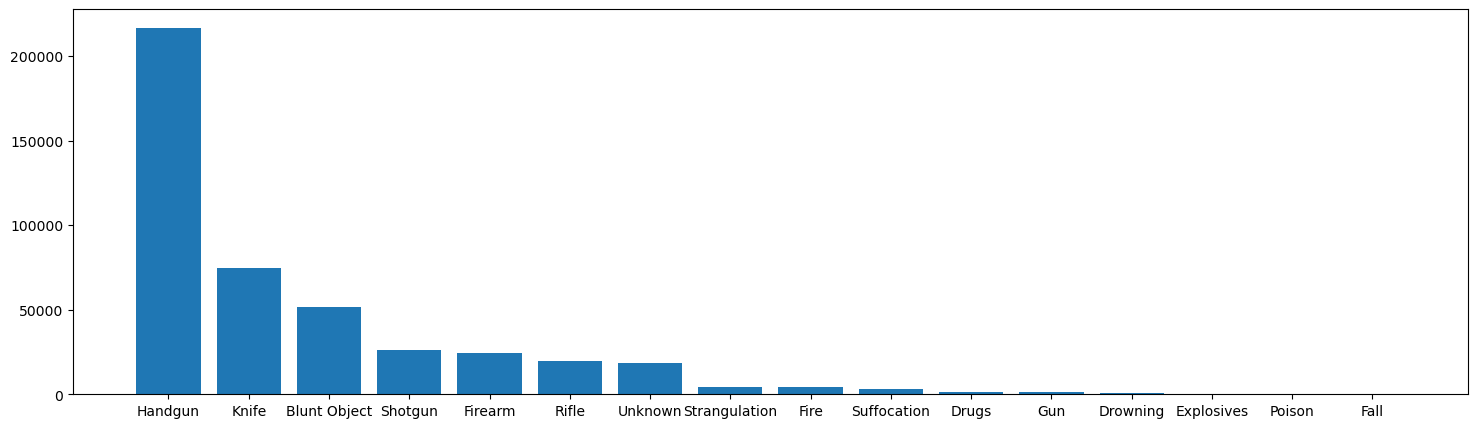

In [6]:
graph = df['Weapon'].value_counts()

plt.figure(figsize = (18, 5))
plt.bar(graph.index, graph.values)
plt.show()

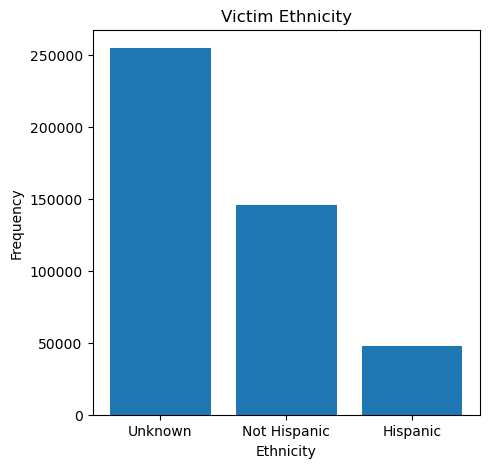

In [7]:
graph = df['Victim Ethnicity'].value_counts()

plt.figure(figsize = (5, 5))
plt.bar(graph.index, graph.values)
plt.title('Victim Ethnicity')
plt.ylabel('Frequency')
plt.xlabel('Ethnicity')
plt.show()

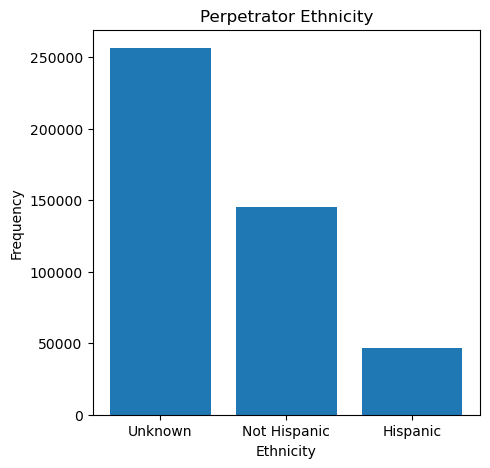

In [8]:
graph = df['Perpetrator Ethnicity'].value_counts()

plt.figure(figsize = (5, 5))
plt.bar(graph.index, graph.values)
plt.title('Perpetrator Ethnicity')
plt.ylabel('Frequency')
plt.xlabel('Ethnicity')
plt.show()

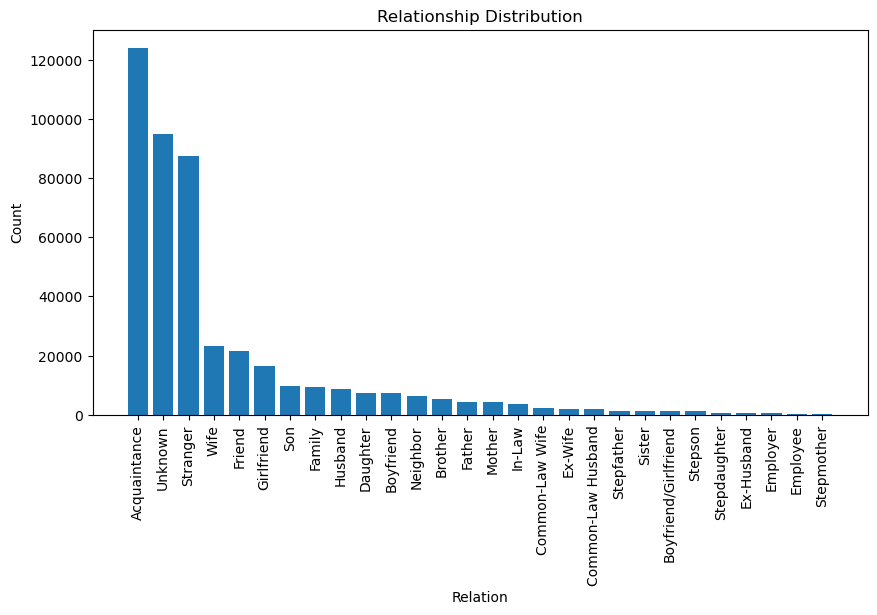

In [9]:
graph = df['Relationship'].value_counts()

plt.figure(figsize = (10, 5))
plt.bar(graph.index, graph.values)
plt.xticks(rotation = 'vertical')
plt.title('Relationship Distribution')
plt.xlabel('Relation')
plt.ylabel('Count')
plt.show()

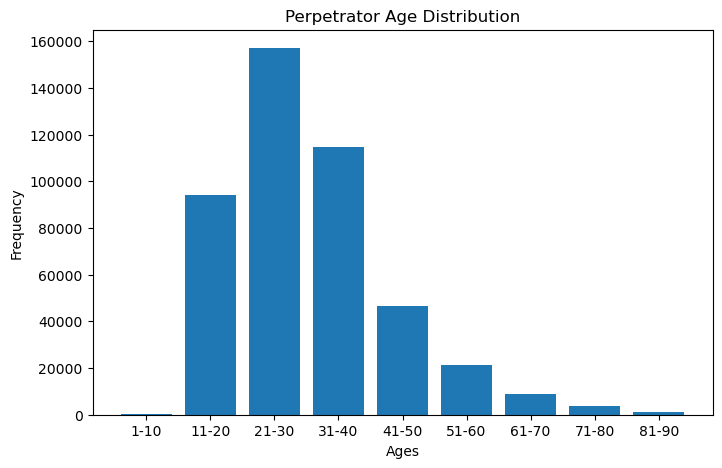

In [10]:
import seaborn as sns

graph = df['Perpetrator Age'].value_counts()

graph = graph.sort_index()

freq = []
temp = []

for i in graph.index:
    temp.append(graph[i])
    if(i % 10 == 0):
        freq.append(sum(temp))
        temp.clear()
                
x = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
plt.figure(figsize = (8, 5))
plt.bar(x, freq, width = .8, align = 'center')
plt.title('Perpetrator Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

10


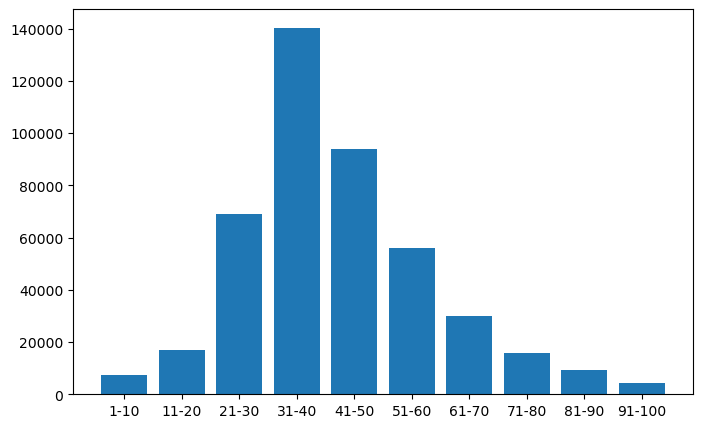

In [11]:
graph = df['Victim Age'].value_counts()

graph = graph.sort_index()

freq = []
temp = []

for i in graph.index:
    temp.append(graph[i])
    if(i % 10 == 0):
        freq.append(sum(temp))
        temp.clear()
        
print(len(freq))
        
x = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
plt.figure(figsize = (8, 5))
plt.bar(x, freq, width = .8, align = 'center')
plt.show()

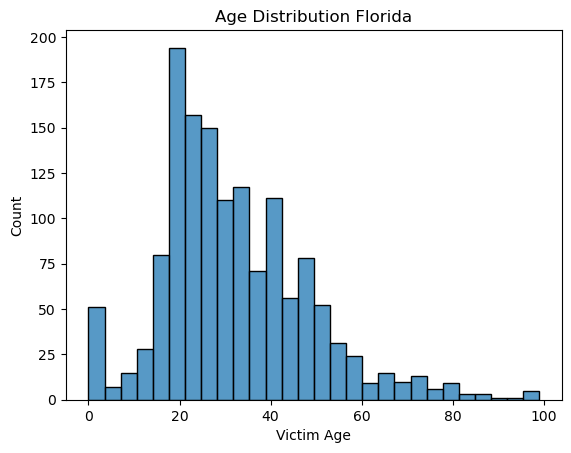

In [12]:
mask = df['State'] == 'Florida'
df_old = df[mask]

mask = df_old['Crime Type'] == 'Manslaughter by Negligence'
df_oldold = df_old[mask]

sns.histplot(data = df_oldold['Victim Age'])
plt.title('Age Distribution Florida')
plt.show()

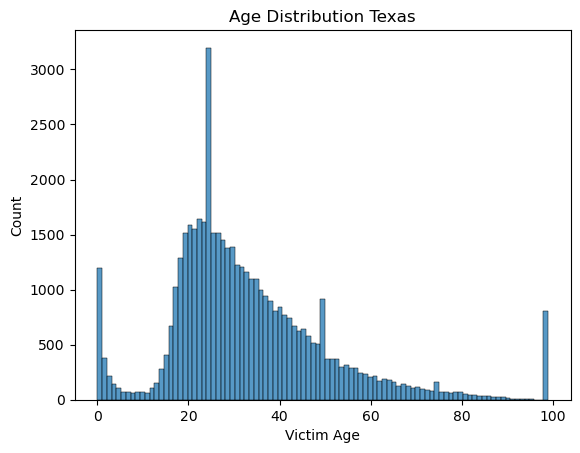

In [13]:
mask = df['State'] == 'Texas'
df_old = df[mask]

mask = df_old['Crime Type'] == 'Manslaughter by Negligence'
df_oldold = df_old[mask]

sns.histplot(data = df_old['Victim Age'])
plt.title('Age Distribution Texas')
plt.show()

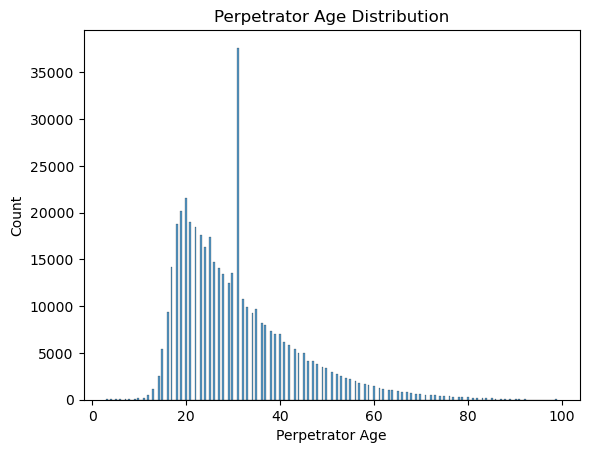

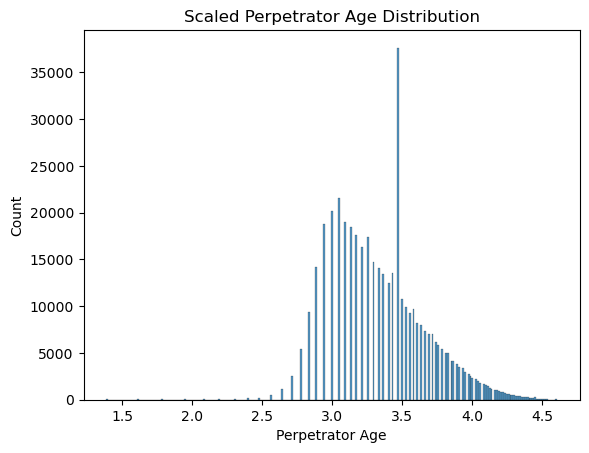

In [14]:
sns.histplot(data = df['Perpetrator Age'])
plt.title('Perpetrator Age Distribution')
plt.show()

df['Perpetrator Age'] = np.log(df['Perpetrator Age'] + 1)

sns.histplot(data = df['Perpetrator Age'])
plt.title('Scaled Perpetrator Age Distribution')
plt.show()

99


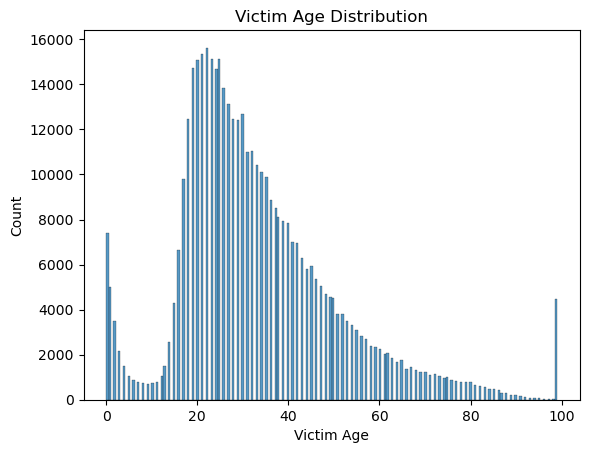

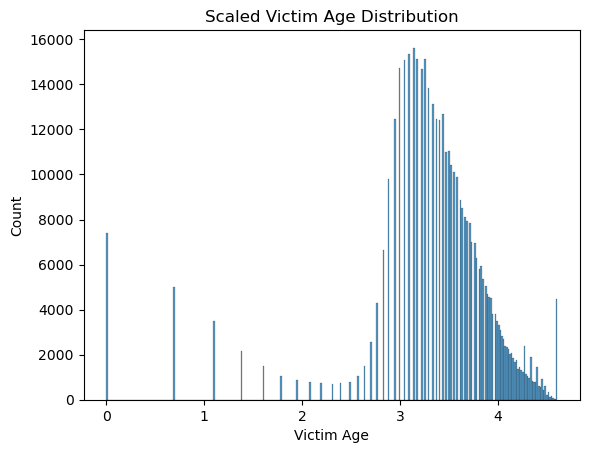

In [15]:
print(max(df['Victim Age']))

sns.histplot(data = df['Victim Age'])
plt.title('Victim Age Distribution')
plt.show()

df['Victim Age'] = np.log(df['Victim Age'] + 1)

sns.histplot(data = df['Victim Age'])
plt.title('Scaled Victim Age Distribution')
plt.show()

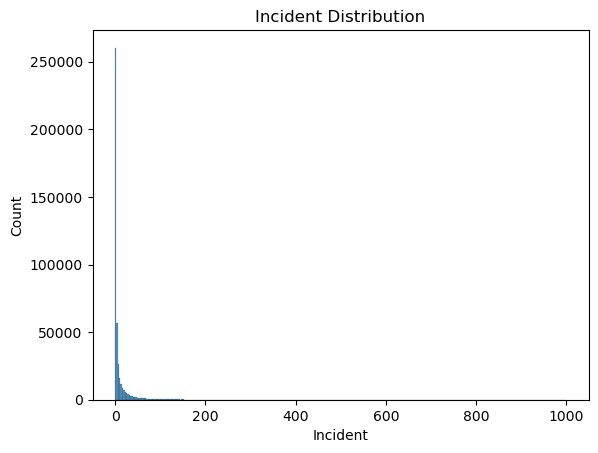

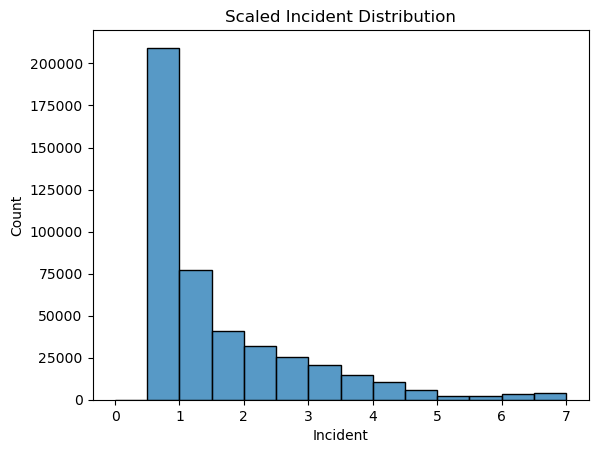

In [16]:
sns.histplot(data = df['Incident'], binwidth = 3)
plt.title('Incident Distribution')
plt.show()

df['Incident'] = np.log(df['Incident'] + 1)

sns.histplot(data = df['Incident'], binwidth = .5)
plt.title('Scaled Incident Distribution')
plt.show()

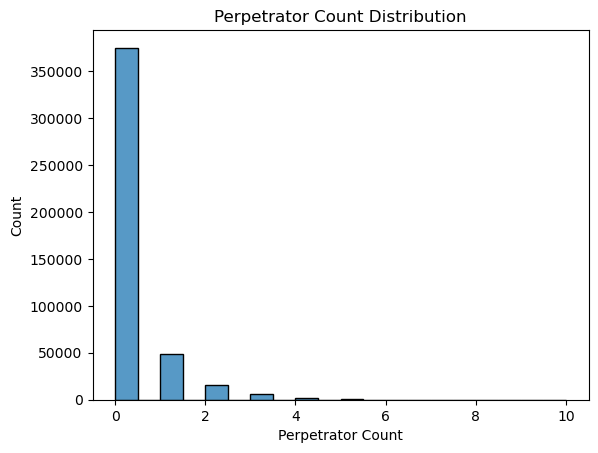

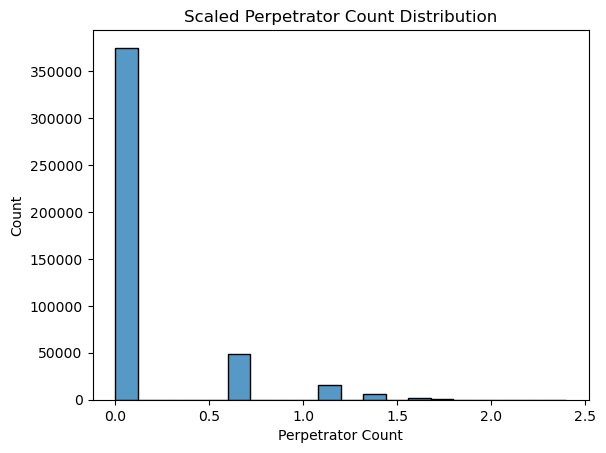

In [17]:
sns.histplot(data = df['Perpetrator Count'])
plt.title('Perpetrator Count Distribution')
plt.show()

df['Perpetrator Count'] = np.log(df['Perpetrator Count'] + 1)

sns.histplot(data = df['Perpetrator Count'])
plt.title('Scaled Perpetrator Count Distribution')
plt.show()

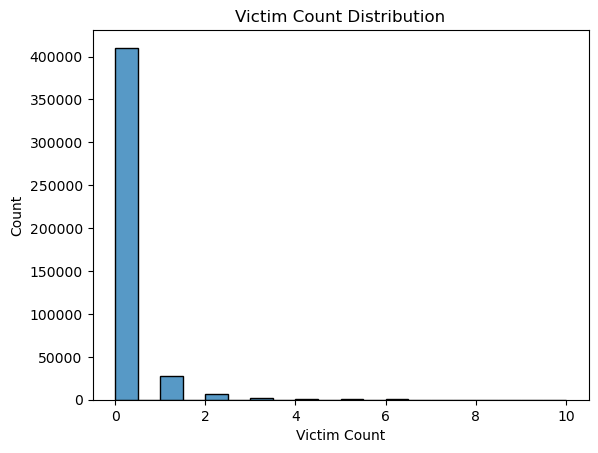

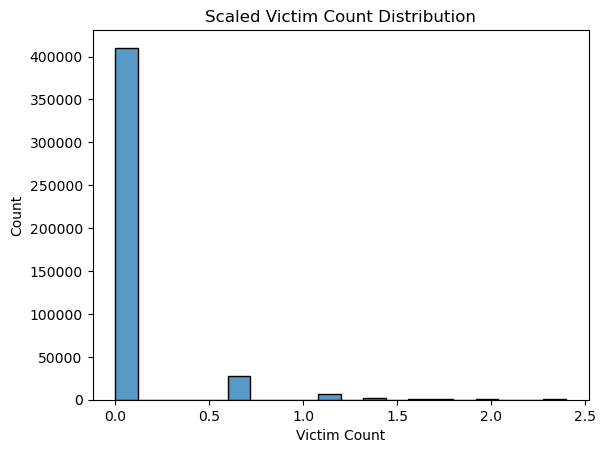

In [18]:
sns.histplot(data = df['Victim Count'])
plt.title('Victim Count Distribution')
plt.show()

df['Victim Count'] = np.log(df['Victim Count'] + 1)

sns.histplot(data = df['Victim Count'])
plt.title('Scaled Victim Count Distribution')
plt.show()

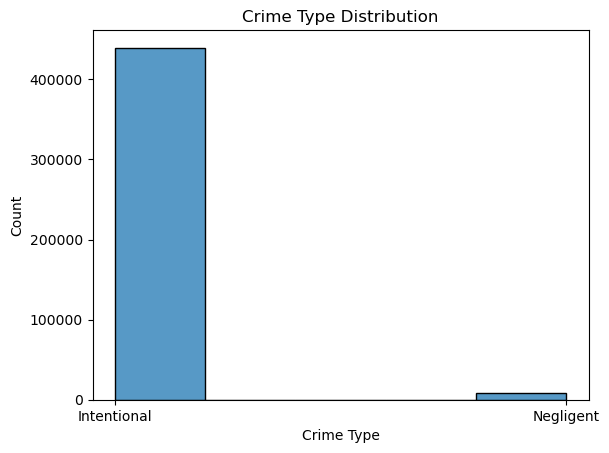

In [19]:
sns.histplot(data = df['Crime Type'], discrete = False, binwidth = .2)
plt.xticks([0, 1], ['Intentional', 'Negligent'])
plt.title('Crime Type Distribution')
plt.show()

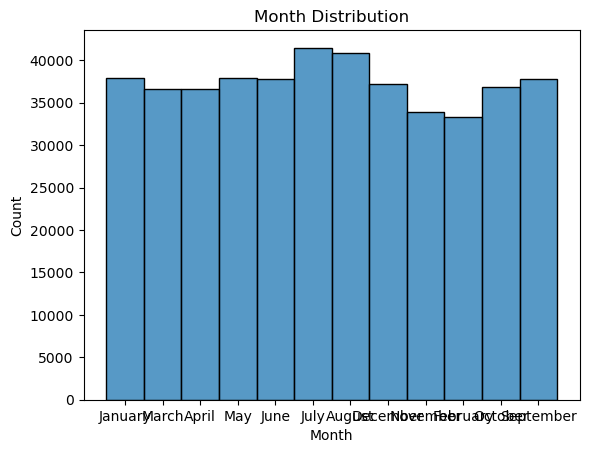

In [20]:
sns.histplot(data = df['Month'])
plt.title('Month Distribution')
plt.show()

In [21]:
print(df['Agency Type'].unique())

['Municipal Police' 'County Police' 'State Police' 'Sheriff'
 'Special Police' 'Regional Police' 'Tribal Police']


In [22]:
mask = df['Crime Type'] == 'Manslaughter by Negligence'
b = df[mask]

b

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Victim Sex,Victim Age,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
23,North Slope Borough,County Police,North Slope,Alaska,1980,July,0.693147,Manslaughter by Negligence,Female,3.713572,...,Unknown,Male,3.737670,Unknown,Unknown,Wife,Blunt Object,0.0,0.000000,FBI
31,Alaska State Police,State Police,Juneau,Alaska,1980,June,0.693147,Manslaughter by Negligence,Female,2.197225,...,Unknown,Male,2.079442,Asian/Pacific Islander,Unknown,Sister,Rifle,0.0,0.000000,FBI
39,Alaska State Police,State Police,Juneau,Alaska,1980,October,1.386294,Manslaughter by Negligence,Male,3.828641,...,Unknown,Male,3.912023,White,Unknown,Acquaintance,Rifle,0.0,0.000000,FBI
40,Alaska State Police,State Police,Juneau,Alaska,1980,October,1.609438,Manslaughter by Negligence,Male,3.091042,...,Unknown,Male,3.091042,White,Unknown,Friend,Rifle,0.0,0.000000,FBI
43,Alaska State Police,State Police,Juneau,Alaska,1980,November,1.386294,Manslaughter by Negligence,Female,3.713572,...,Unknown,Male,3.610918,White,Unknown,Friend,Rifle,0.0,0.000000,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628566,Spalding County,Sheriff,Spalding,Georgia,2014,May,0.693147,Manslaughter by Negligence,Male,3.526361,...,Not Hispanic,Male,3.044522,White,Not Hispanic,Stranger,Knife,0.0,0.000000,FBI
631630,St. Robert,Municipal Police,Pulaski,Missouri,2014,October,0.693147,Manslaughter by Negligence,Male,3.526361,...,Not Hispanic,Male,3.610918,White,Not Hispanic,Son,Suffocation,0.0,0.000000,FBI
632459,Statesville,Municipal Police,Iredell,North Carolina,2014,July,0.693147,Manslaughter by Negligence,Male,3.526361,...,Unknown,Female,3.401197,Black,Unknown,Unknown,Blunt Object,0.0,0.693147,FBI
634508,Ardmore,Municipal Police,Carter,Oklahoma,2014,June,5.308268,Manslaughter by Negligence,Male,3.526361,...,Not Hispanic,Male,3.761200,Native American/Alaska Native,Not Hispanic,Family,Unknown,0.0,0.000000,FBI


In [23]:
mask = b['Relationship'] == 'Friend'
a = b[mask]

a

,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Victim Sex,Victim Age,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
40,Alaska State Police,State Police,Juneau,Alaska,1980,October,1.609438,Manslaughter by Negligence,Male,3.091042,...,Unknown,Male,3.091042,White,Unknown,Friend,Rifle,0.0,0.0,FBI
43,Alaska State Police,State Police,Juneau,Alaska,1980,November,1.386294,Manslaughter by Negligence,Female,3.713572,...,Unknown,Male,3.610918,White,Unknown,Friend,Rifle,0.0,0.0,FBI
60,Jefferson,Sheriff,Jefferson,Alabama,1980,November,0.693147,Manslaughter by Negligence,Male,2.639057,...,Not Hispanic,Male,2.772589,White,Not Hispanic,Friend,Shotgun,0.0,0.0,FBI
281,Montgomery,Municipal Police,Montgomery,Alabama,1980,May,1.386294,Manslaughter by Negligence,Male,2.772589,...,Unknown,Male,2.708050,White,Unknown,Friend,Shotgun,0.0,0.0,FBI
601,Faulkner,Sheriff,Faulkner,Arkansas,1980,June,0.693147,Manslaughter by Negligence,Male,3.178054,...,Not Hispanic,Male,3.135494,Black,Not Hispanic,Friend,Handgun,0.0,0.0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351921,Amarillo,Municipal Police,Potter,Texas,1996,February,1.098612,Manslaughter by Negligence,Male,2.890372,...,Not Hispanic,Male,3.465736,Unknown,Unknown,Friend,Handgun,0.0,0.0,FBI
369160,Aransas,Sheriff,Aransas,Texas,1997,November,0.693147,Manslaughter by Negligence,Female,2.397895,...,Hispanic,Male,3.465736,White,Not Hispanic,Friend,Shotgun,0.0,0.0,FBI
378117,South Bend,Municipal Police,St. Joseph,Indiana,1998,February,1.098612,Manslaughter by Negligence,Male,2.833213,...,Unknown,Female,3.465736,White,Unknown,Friend,Shotgun,0.0,0.0,FBI
461297,Cleveland,Municipal Police,Cuyahoga,Ohio,2003,May,2.397895,Manslaughter by Negligence,Male,3.871201,...,Unknown,Male,3.465736,White,Unknown,Friend,Blunt Object,0.0,0.0,FBI
